# Using linear regressions to determine the ceteris paribus effect of socioeconomic indicators on the support of the constitutional reform in Santiago de Chile.

In this example, I show how to combine social, economic and political data. As a political scientist, I'm particularly interested in describing the relationship between poverty and electoral outcomes of a constitutional referendum in Chile in 2020. The relationship between mean communal income and electoral results and significant at less than 1%; in other words, an increase in communal income is statistically correlated with lower support to the constitutional reform.  


In [51]:
import pandas as pd
import janitor 

data = "/home/sebastian/Insync/lshuneeus@uc.cl/Google Drive/curso analisis datos politicos 2020/ayudantias shuneeus/bases_ayudantias/bd_plebiscito.xlsx"

plebiscito = pd.read_excel(data, index_col = 1).clean_names().dropna(how='all')

plebiscito.head(10)


,idcomuna,total_mesas,total_electores,total_votacion,apruebo,rechazo,personas_pobreza_ingresos,porc_pobreza_ingresos,ingreso_promedio,ingresos_municipales_pc
Comuna,,,,,,,,,,
ALHUE,13502.0,21.0,6004.0,2640.0,2323.0,309.0,303.0,0.067129,798231.0,538.94
BUIN,13402.0,251.0,73511.0,40566.0,33211.0,7166.0,6017.0,0.080409,625848.0,199.84
CALERA DE TANGO,13403.0,65.0,22016.0,12750.0,9352.0,3340.0,1112.0,0.035296,794797.0,316.34
CERRILLOS,13102.0,205.0,67845.0,37316.0,31189.0,5973.0,3826.0,0.064762,742848.0,191.99
CERRO NAVIA,13103.0,350.0,116544.0,64105.0,55908.0,7812.0,9046.0,0.075858,602208.0,171.38
COLINA,13301.0,258.0,87987.0,49450.0,32524.0,16625.0,7919.0,0.063959,857981.0,221.37
CONCHALI,13104.0,387.0,119859.0,65349.0,56064.0,8987.0,6653.0,0.074320,695487.0,202.68
CURACAVI,13503.0,75.0,25834.0,14789.0,11713.0,2970.0,2346.0,0.074388,648777.0,168.98
EL BOSQUE,13105.0,409.0,138923.0,75827.0,64401.0,11048.0,14680.0,0.095841,667570.0,114.52


In [52]:
plebiscito["percent_approval"] = plebiscito["apruebo"] / plebiscito["total_votacion"] 

In [53]:
plebiscito.describe()

,idcomuna,total_mesas,total_electores,total_votacion,apruebo,rechazo,personas_pobreza_ingresos,porc_pobreza_ingresos,ingreso_promedio,percent_approval
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000
mean,13238.076923,337.673077,112296.096154,63561.192308,50466.903846,12793.307692,7447.211538,0.057790,8.346658e+05,0.798904
std,178.051309,274.266631,91530.134319,52827.130751,43811.775006,15046.243246,10796.269006,0.027729,3.074837e+05,0.117150
min,13101.000000,21.000000,6004.000000,2640.000000,2323.000000,309.000000,99.000000,0.001347,5.454530e+05,0.329051
25%,13113.750000,170.250000,57485.000000,33589.000000,22603.000000,5630.000000,2651.250000,0.042011,6.638655e+05,0.803824
50%,13126.500000,276.500000,90727.500000,53190.000000,40889.500000,7984.000000,4267.000000,0.057929,7.330865e+05,0.835980
75%,13401.250000,403.500000,138422.750000,73034.000000,59865.750000,13277.000000,6369.500000,0.074427,8.524722e+05,0.861383
max,13605.000000,1245.000000,398965.000000,243011.000000,208642.000000,92423.000000,63255.000000,0.141421,1.957997e+06,0.881943


In [54]:
plebiscito = plebiscito.rename(columns={  "porc_pobreza_ingresos":"poverty",
                                          "ingreso_promedio" : "mean_income"})

Text(0.5, 0, 'Percentage')

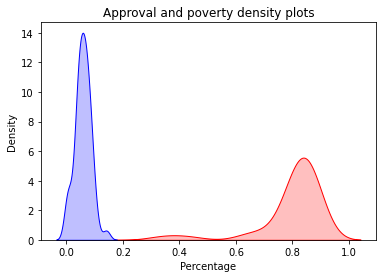

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

p1=sns.kdeplot(plebiscito['percent_approval'], shade=True, color="r")
p1=sns.kdeplot(plebiscito['poverty'], shade=True, color="b")
plt.title('Approval and poverty density plots')
plt.xlabel('Percentage')

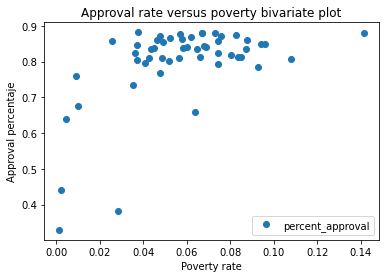

In [56]:
plebiscito.plot(y='percent_approval', x='poverty', style='o')
plt.title('Approval rate versus poverty bivariate plot')
plt.xlabel('Poverty rate')
plt.ylabel('Approval percentaje')
plt.show()

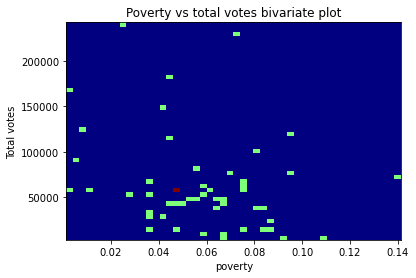

In [57]:
x =plebiscito["poverty"]
y = plebiscito["total_votacion"]

plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.title('Poverty vs total votes bivariate plot')
plt.xlabel('poverty')
plt.ylabel('Total votes')
plt.show()

In [58]:
# https://www.statsmodels.org/devel/example_formulas.html

import statsmodels.api as sm
import statsmodels.formula.api as smf

linear_model = smf.ols(formula ='percent_approval ~ poverty + mean_income', data=plebiscito)

result = linear_model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:       percent_approval   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     69.43
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           5.02e-15
Time:                        18:27:15   Log-Likelihood:                 73.165
No. Observations:                  52   AIC:                            -140.3
Df Residuals:                      49   BIC:                            -134.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1242      0.054     20.776      

/home/sebastian/anaconda3/envs/prueba1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


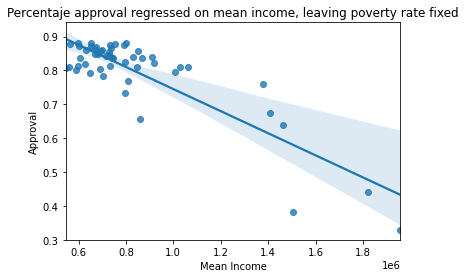

In [59]:
sns.regplot(plebiscito.mean_income, plebiscito.percent_approval)
plt.title('Percentaje approval regressed on mean income, leaving poverty rate fixed')
plt.xlabel('Mean Income')
plt.ylabel('Approval')
plt.show()
